### Import packages

In [1]:
## numpy: package for cumputing numerical arrays
from numpy.linalg import inv #inverse of a matrix
import numpy as np
np.set_printoptions(precision=4) #precision of arrays
#i have set a custom threshold of 9 sigfigs after decimal

## matplotlib: package for plotting
from matplotlib import pyplot as plt
%matplotlib inline

## import functions from twinning
import sys; sys.path.insert(0, '..')
from nmgjunctions.twinning import *

In [2]:
## lattice parameters
a,b,c,gamma = [0.5972, 0.5944, 0.5584, np.deg2rad(90.37)] #NMG lattice parameter: Seiner et al. (2019)
#a,b,c,gamma = [1., 0.97, 0.94, np.deg2rad(94)] #Exaggerated lattice

## irrational element of NC twins
q3 = (2*a*b*np.cos(gamma) - np.sqrt(a**4 + b**4 + 2*a**2*b**2*np.cos(2*gamma)))/(a**2 - b**2)
q4 = (2*a*b*np.cos(gamma) + np.sqrt(a**4 + b**4 + 2*a**2*b**2*np.cos(2*gamma)))/(a**2 - b**2)
## q4 * q3 ≃ -1

$V_1$

[[ 1.     -0.0064  0.    ]
 [ 0.     -0.9953  0.    ]
 [ 0.      0.     -0.935 ]]


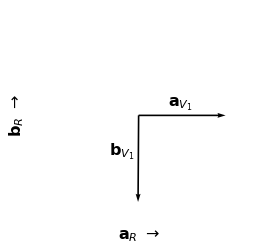

In [3]:
## Transformation: R ↔ V₁
rPv1 = np.array([[1,b/a*np.cos(gamma),0],[0,-b/a*np.sin(gamma),0],[0,0,-c/a]])
print(applythresh(rPv1))

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv1)

ax.text(+0.015,+0.005,r'$\mathbf{a}_{V_1}$',fontsize=16) #label vector a
ax.text(-0.015,-0.02,r'$\mathbf{b}_{V_1}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

$V_4$

[[-0.008  -0.9952  0.    ]
 [-1.      0.0144  0.    ]
 [ 0.      0.     -0.935 ]]


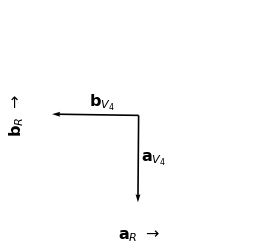

In [4]:
## Orientation Relationship   rL: V₁ → V₄ 

#(1 q3 0) NC twins
C = applythresh(rotationmatrix([0,0,1],np.pi/2)) 
rL_v1tov4 = OR_RefFrame([-1,-q3,0],[-q3,1,0],C,rPv1,a)

#Transformation relation: R ↔ V₄
rPv4 = rL_v1tov4 @ rPv1
del C

print(rPv4)

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv4)

ax.text(+0.001,-0.023,r'$\mathbf{a}_{V_4}$',fontsize=16) #label vector a
ax.text(-0.025,0.005,r'$\mathbf{b}_{V_4}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

$V_2$

[[-0.9998 -0.0126  0.    ]
 [ 0.0191 -0.9952  0.    ]
 [ 0.      0.      0.935 ]]


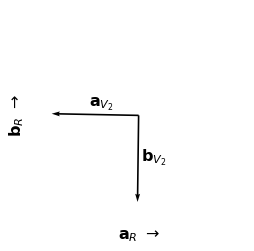

In [5]:
rL_v4tov2 = rotationmatrix([-1,-1,0] @ inv(rPv4), np.pi)

#Transformation relation: R ↔ V₄
rPv2 = rL_v4tov2 @ rPv4

print(rPv2)

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv2)

ax.text(-0.025,0.005,r'$\mathbf{a}_{V_2}$',fontsize=16) #label vector a
ax.text(+0.001,-0.023,r'$\mathbf{b}_{V_2}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

$V_1^*$

[[ 0.9998 -0.0254  0.    ]
 [-0.0191 -0.995   0.    ]
 [ 0.      0.     -0.935 ]]


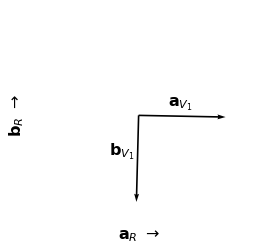

In [6]:
rL_v2tov1 = rotationmatrix([0,-1,0] @ inv(rPv2), np.pi)

#Transformation relation: R ↔ V₄
rPv1s = rL_v2tov1 @ rPv2

print(rPv1s)

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv1s)

ax.text(+0.015,+0.005,r'$\mathbf{a}_{V_1}$',fontsize=16) #label vector a
ax.text(-0.015,-0.02,r'$\mathbf{b}_{V_1}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

In [7]:
M = rL_v2tov1 @ rL_v4tov2 @ rL_v1tov4
M

array([[ 0.9998,  0.0191,  0.    ],
       [-0.0191,  0.9998,  0.    ],
       [ 0.    ,  0.    ,  1.    ]])

In [8]:
np.rad2deg(np.arcsin(M[0,1]))/6

0.18252275882469138